<a href="https://colab.research.google.com/github/zoed98/Python-Machine-Learning/blob/main/15_15CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [6]:
dbts = load_diabetes()

In [7]:
print(dbts.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
dbts.data.shape

(442, 10)

In [9]:
dbts.target.shape

(442,)

In [10]:
dbts.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [13]:
pd.set_option('precision', 4)

In [14]:
pd.set_option('max_columns', 9)

In [15]:
pd.set_option('display.width', None)

In [16]:
dbts_df = pd.DataFrame(dbts.data,columns=dbts.feature_names)

In [17]:
dbts_df ['MedHouseValue'] = pd.Series(dbts.target)

In [18]:
dbts_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,MedHouseValue
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [19]:
dbts_df.describe()

,age,sex,bmi,bp,...,s4,s5,s6,MedHouseValue
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,...,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-3.6396e-16,1.3099e-16,-8.0140e-16,1.2898e-16,...,3.8632e-16,-3.8481e-16,-3.3985e-16,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,...,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,...,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,...,-3.9493e-02,-3.3249e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6706e-03,...,-2.5923e-03,-1.9476e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,...,3.4309e-02,3.2433e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,...,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


In [20]:
sample_df = dbts_df.sample(frac=0.1, random_state=17)

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [23]:
sns.set_style('whitegrid')

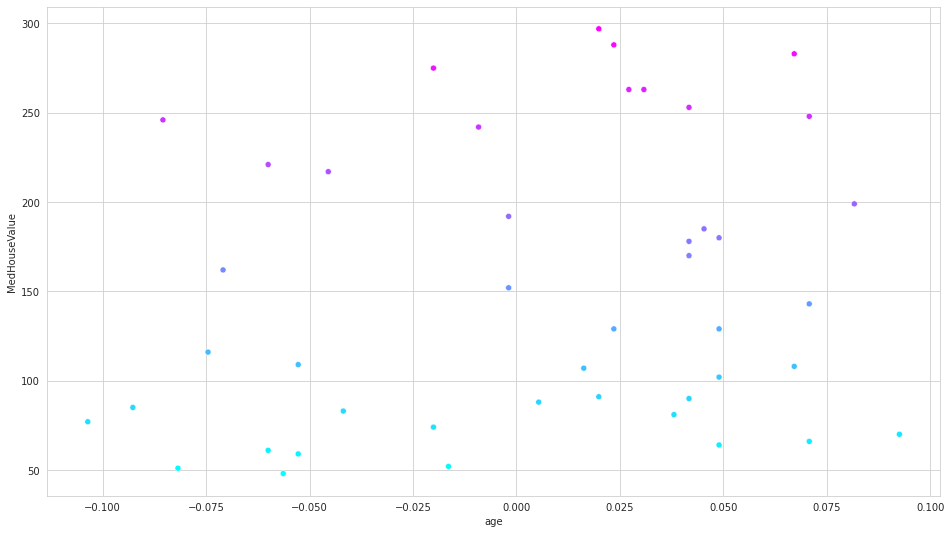

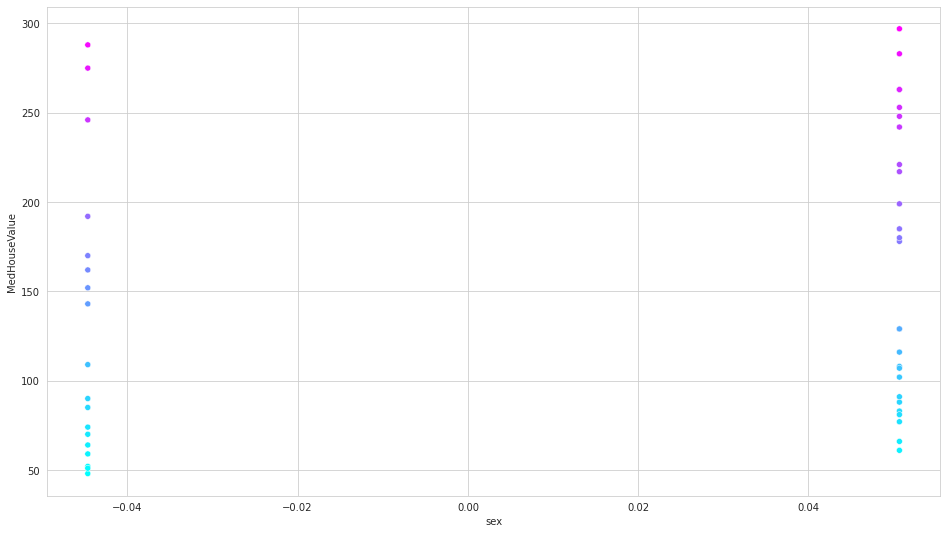

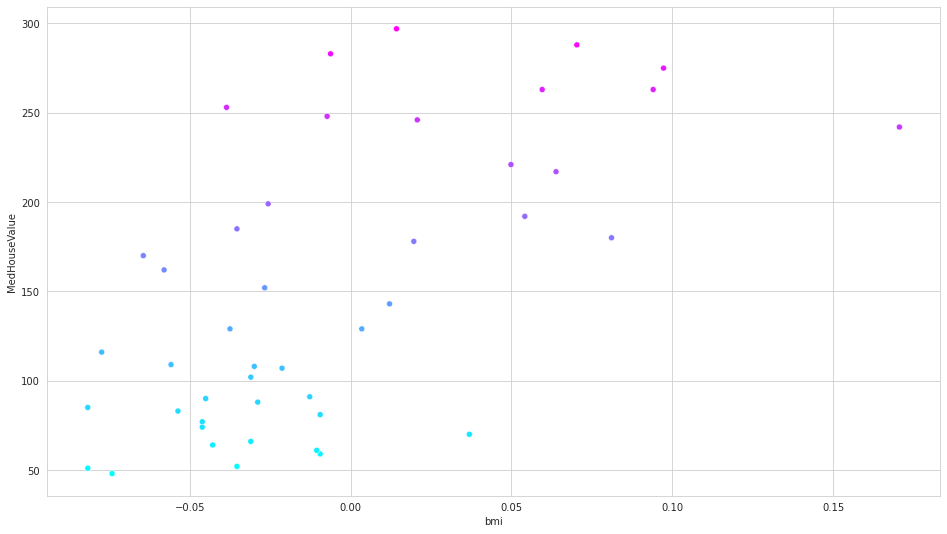

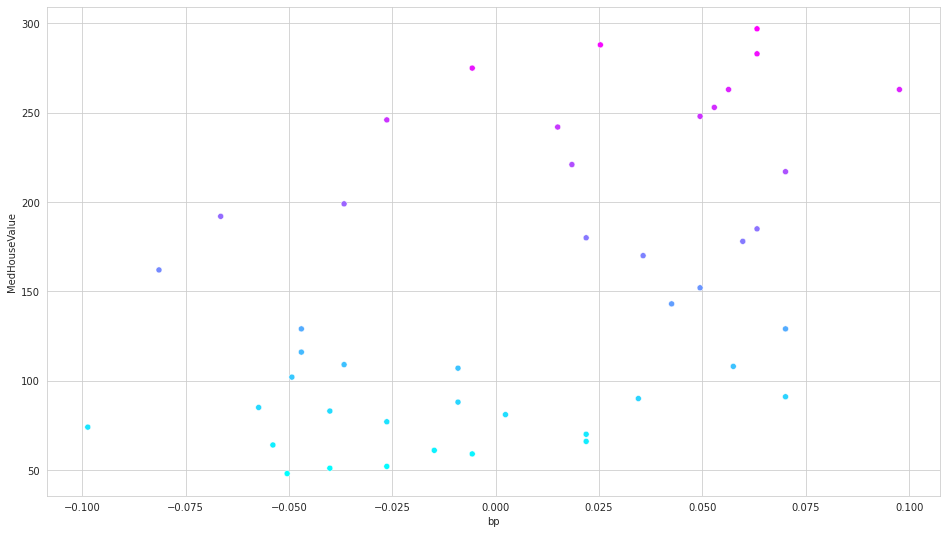

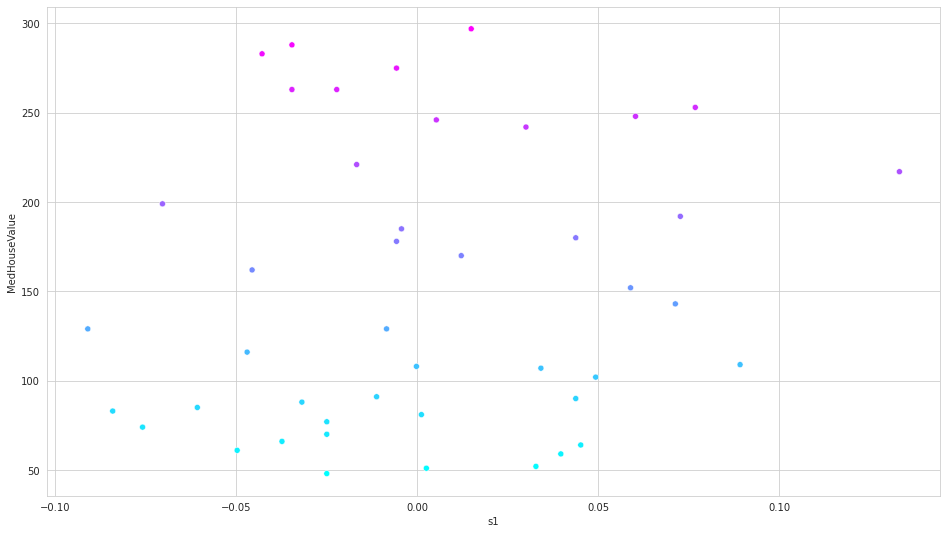

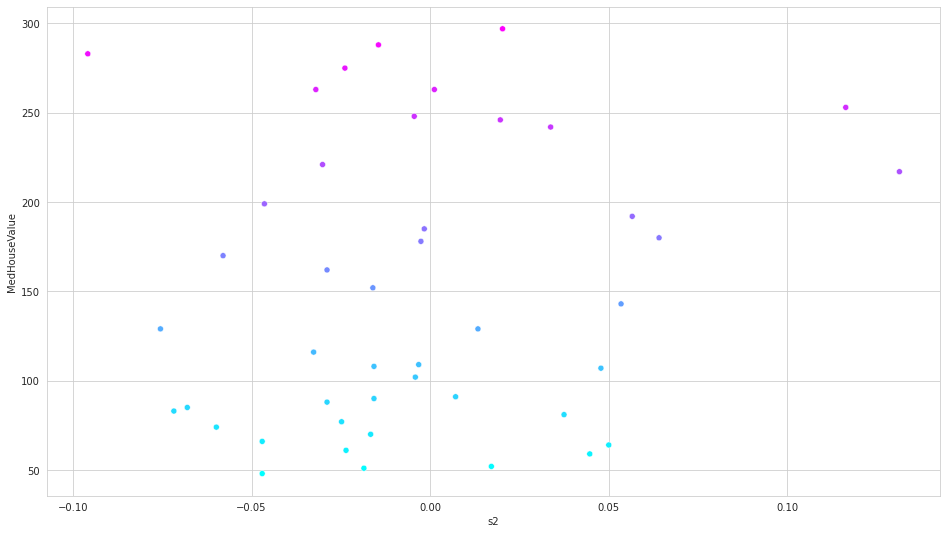

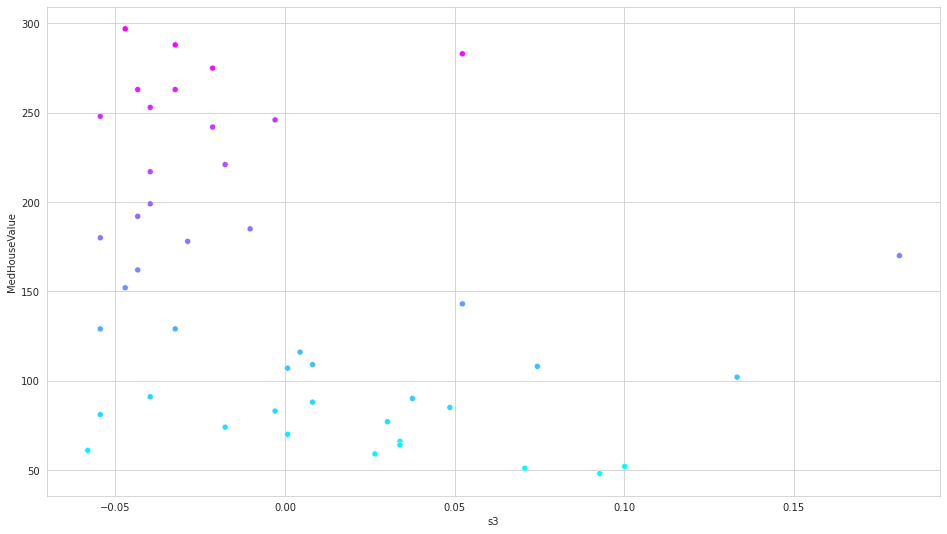

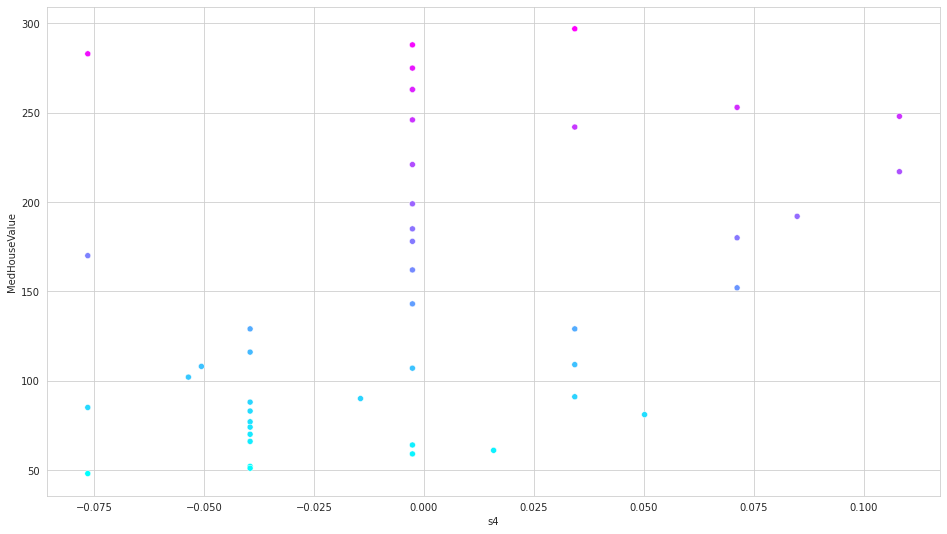

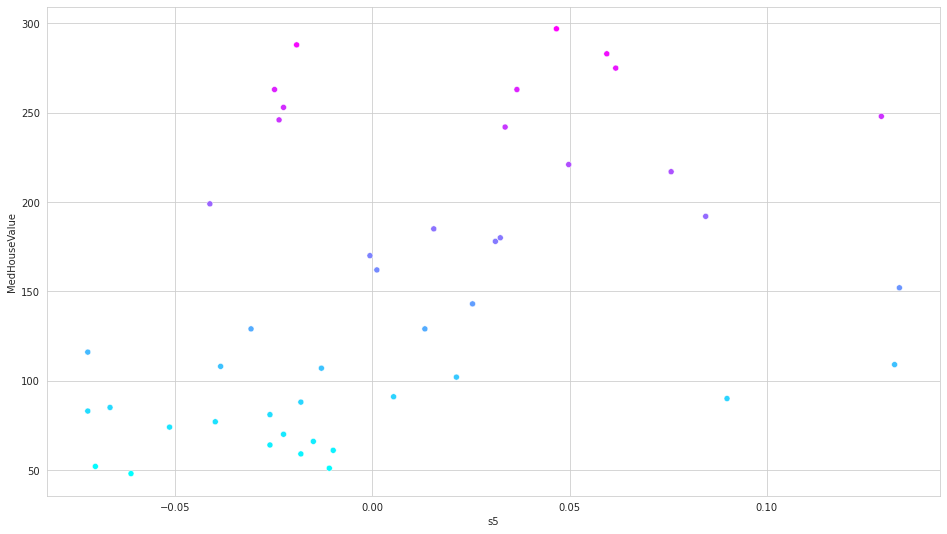

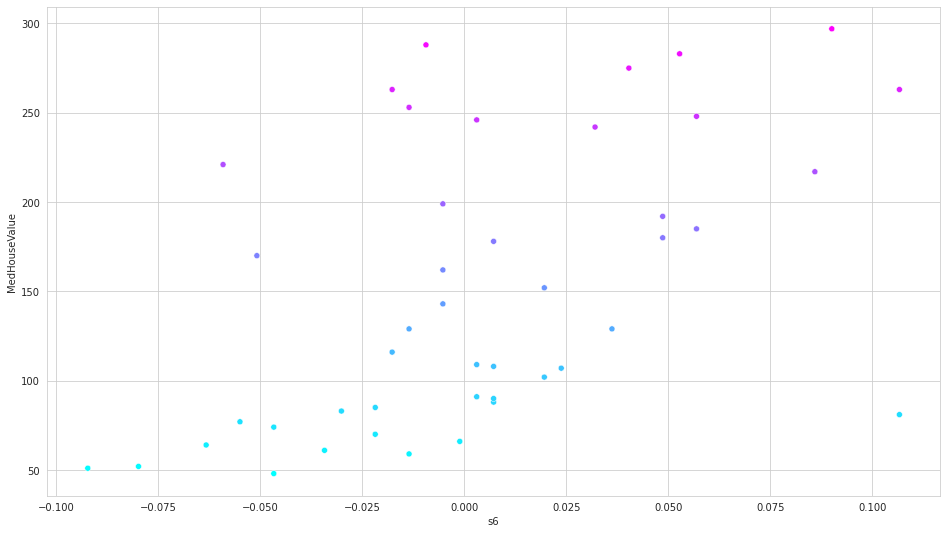

In [24]:
for feature in dbts.feature_names: 
  plt.figure(figsize=(16,9))
  sns.scatterplot(data=sample_df, x=feature,
                  y='MedHouseValue', hue='MedHouseValue',
                  palette='cool', legend=False)


In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    dbts.data, dbts.target, random_state=11)

In [28]:
X_train.shape

(331, 10)

In [29]:
X_test.shape

(111, 10)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linear_regression = LinearRegression()

In [32]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [33]:
for i, name in enumerate(dbts.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.221893331882335
       sex: -266.45890749037505
       bmi: 523.0596748020042
        bp: 310.51485159166873
        s1: -336.17030792547865
        s2: 137.344544538294
        s3: -131.13560429688624
        s4: -1.1485501589064313
        s5: 622.3374924905781
        s6: 60.46751763603552


In [34]:
linear_regression.intercept_

152.22835839334243

In [35]:
predicted = linear_regression.predict(X_test)

In [36]:
expected = y_test

In [37]:
predicted[:5]

array([115.46727109,  83.46033257, 160.77912055, 187.65807631,
        72.72355267])

In [38]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [40]:
df = pd.DataFrame()

In [41]:
df['Expected'] = pd.Series(expected)

In [43]:
df['Predicted'] = pd.Series(predicted)

In [44]:
figure = plt.figure(figsize=(9, 9))

<Figure size 648x648 with 0 Axes>

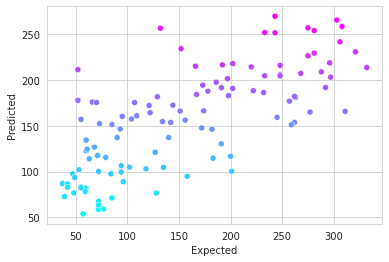

In [46]:
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted',palette='cool', legend=False)

In [47]:
start = min(expected.min(), predicted.min())

In [48]:
end = max(expected.max(), predicted.max())

In [49]:
axes.set_xlim(start, end)

(37.0, 332.0)

In [50]:
axes.set_ylim(start, end)

(37.0, 332.0)

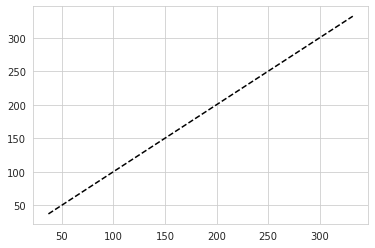

In [51]:
line = plt.plot([start, end], [start, end], 'k--')

In [52]:
from sklearn import metrics

In [53]:
metrics.r2_score(expected, predicted)

0.5322440129151977

In [54]:
metrics.mean_squared_error(expected, predicted)

3458.2229332614693

In [55]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [56]:
estimators = {
    'LinearRegression' : linear_regression,
    'ElasticNet' : ElasticNet(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge()
}

In [57]:
from sklearn.model_selection import KFold, cross_val_score

In [59]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=dbts.data, y=dbts.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
